# Tf04. Linear Regression

### y= 2x+b

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#hyperparameter(학습량(비율))
learning_rate=0.01   
training_epochs=100


# 입력값은 -1과 1사이에 균등하게 위치하는 101값으로 구성
x_train=np.linspace(-1,1, 101)
# 노이지가 들어가게 설계
y_train=2*x_train+np.random.randn(*x_train.shape)*0.33

# 입력노드와 출력노드를 placeholder로 설정
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

#모델을 y=wX
def model(X,w):
    return tf.multiply(X,w)
#가중치 변수
w=tf.Variable(0.0, name="weights")

#비용함수 정의
y_model=model(X,w)
cost=tf.square(Y-y_model)

#경사하강법
#학습알고리즘이 반복될때마다 호출될 연산을 정의
train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


In [10]:
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for(x,y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X:x, Y:y})

w_val=sess.run(w)
sess.close() 

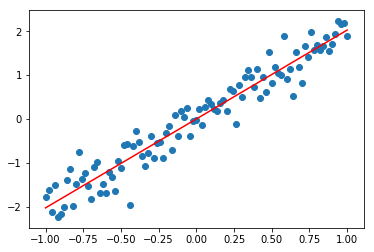

In [11]:
y_learned=x_train*w_val
plt.scatter(x_train, y_train)
plt.plot(x_train, y_learned, 'r')
plt.show()